In [9]:
print(1e-2)

0.01


In [10]:
import tensorflow as tf
from tensorflow import keras

In [17]:
# 버전 확인

print(tf.__version__)
print(keras.__version__)

1.13.1
2.2.4-tf


In [12]:
# 모델 학습 시 불필요한 출력을 끄도록 함 (warning)
import tensorflow as tf

tf.logging.set_verbosity(tf.logging.ERROR)

# 케라스 모델 2가지 버전

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(784,)))
model.add(layers.Dense(10, activation='softmax'))

In [22]:
from tensorflow.keras.models import Model
from tensorflow.keras import layers

input_tensor = layers.Input(shape=(784,))
x = layers.Dense(32, activation='relu')(input_tensor)
output_tensor = layers.Dense(10, activation='softmax')(x)

model = Model(inputs=input_tensor, outputs=output_tensor)

# MNIST 숫자 이미지 분류 문제

In [23]:
from tensorflow.keras.datasets import mnist

# 1. 데이터 준비
(X_train, y_train), (X_test, y_test) = mnist.load_data()

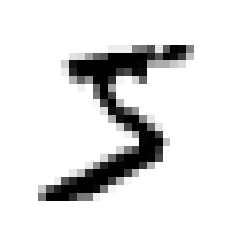

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(X_train[0], cmap='binary')
plt.axis('off')
plt.show()

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical


# 2. 데이터 전처리
X_train = X_train.reshape((60000, 28*28)).astype('float32') / 255
X_test = X_test.reshape((10000, 28*28)).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 3. 네트워크 정의
model = Sequential()
# model.add(Dense(64, input_shape=(28*28,), activation='relu'))
model.add(Dense(64, batch_input_shape=(None,28*28,), activation='relu'))
model.add(Dense(10, activation='softmax'))

# 4. 구성된 네트워크 정보 출력
model.summary()

# 5. 컴파일
model.compile(loss = 'categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])

# 6. 모델 학습
model.fit(X_train, y_train, epochs=5)

# 7. 모델 평가
loss_and_metrics = model.evaluate(X_train, y_train, verbose=0)
print(loss_and_metrics)

# 8. 새로운 데이터 예측
import numpy as np

sample = X_test[0]
pred = model.predict_classes(np.expand_dims(sample, axis=0))
print(pred)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_13 (Dense)             (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
60000/60000 [==============================] - 5s 83us/sample - loss: 0.6691 - acc: 0.8295
Epoch 2/5
60000/60000 [==============================] - 5s 77us/sample - loss: 0.3440 - acc: 0.9037
Epoch 3/5
60000/60000 [==============================] - 5s 77us/sample - loss: 0.2966 - acc: 0.9163
Epoch 4/5
60000/60000 [==============================] - 5s 79us/sample - loss: 0.2676 - acc: 0.9243
Epoch 5/5
60000/60000 [==============================] - 5s 80us/sample - loss: 0.2459 - acc: 0.9312
[0.23381205962995688, 0.93475

# 데이터 스케일 정규화 안하면?

In [25]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# 1. 데이터 준비
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 2. 데이터 전처리
X_train = X_train.reshape((60000, 28*28)).astype('float32')
X_test = X_test.reshape((10000, 28*28)).astype('float32')
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 3. 네트워크 정의
model = Sequential()
model.add(Dense(64, input_shape=(28*28,), activation='relu'))
model.add(Dense(10, activation='softmax'))

# 4. 구성된 네트워크 정보 출력
model.summary()

# 5. 컴파일
model.compile(loss = 'categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])

# 6. 모델 학습
model.fit(X_train, y_train, epochs=5)

# 7. 모델 평가
loss_and_metrics = model.evaluate(X_train, y_train, verbose=0)
print(loss_and_metrics)

# 8. 새로운 데이터 예측
import numpy as np

sample = X_test[0]
pred = model.predict_classes(np.expand_dims(sample, axis=0))
print(pred)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_15 (Dense)             (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
60000/60000 [==============================] - 5s 87us/sample - loss: 12.8107 - acc: 0.2051
Epoch 2/5
60000/60000 [==============================] - 5s 86us/sample - loss: 12.7341 - acc: 0.2100
Epoch 3/5
60000/60000 [==============================] - 5s 90us/sample - loss: 12.7341 - acc: 0.2100
Epoch 4/5
60000/60000 [==============================] - 5s 88us/sample - loss: 12.7341 - acc: 0.2100
Epoch 5/5
60000/60000 [==============================] - 5s 91us/sample - loss: 12.7341 - acc: 0.2100
[12.734101362101237, 0.2

### learning rate 작게

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# 1. 데이터 준비
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 2. 데이터 전처리
X_train = X_train.reshape((60000, 28*28)).astype('float32')
X_test = X_test.reshape((10000, 28*28)).astype('float32')
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 3. 네트워크 정의
model = Sequential()
model.add(Dense(64, input_shape=(28*28,), activation='relu'))
model.add(Dense(10, activation='softmax'))

# 4. 구성된 네트워크 정보 출력
model.summary()

# 5. 컴파일
from tensorflow.keras.optimizers import SGD
model.compile(loss = 'categorical_crossentropy', optimizer = SGD(lr=0.0001), metrics = ['accuracy'])

# 6. 모델 학습
model.fit(X_train, y_train, epochs=5)

# 7. 모델 평가
loss_and_metrics = model.evaluate(X_train, y_train, verbose=0)
print(loss_and_metrics)

# 8. 새로운 데이터 예측
import numpy as np

sample = X_test[0]
pred = model.predict_classes(np.expand_dims(sample, axis=0))
print(pred)

# 학습한 모델 및 가중치 저장하기

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# 1. 데이터 준비
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 2. 데이터 전처리
X_train = X_train.reshape((60000, 28*28)).astype('float32') / 255
X_test = X_test.reshape((10000, 28*28)).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 3. 네트워크 정의
model = Sequential()
model.add(Dense(64, input_shape=(28*28,), activation='relu'))
model.add(Dense(10, activation='softmax'))

# 4. 구성된 네트워크 정보 출력
model.summary()

# 5. 컴파일
model.compile(loss = 'categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])

# 6. 모델 학습
model.fit(X_train, y_train, epochs=5)

### 모델 저장
model.save('mnist_mlp_model.h5')
print('>> model saved!!')

# 학습된 모델 및 가중치 불러와서 사용하기

In [ ]:
### 모델 불러오기
from tensorflow.keras.models import load_model

model = load_model('mnist_mlp_model.h5')
print('>> model load!!')

In [ ]:
from tensorflow.keras.datasets import mnist
import numpy as np

# 1. 데이터 준비
_, (X_test, y_test) = mnist.load_data()

# 2. 데이터 전처리
X_test = X_test.reshape((10000, 28*28)).astype('float32') / 255

# 8. 새로운 데이터 예측
sample = X_test[0]
pred = model.predict_classes(np.expand_dims(sample, axis=0))
print(pred[0])